/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


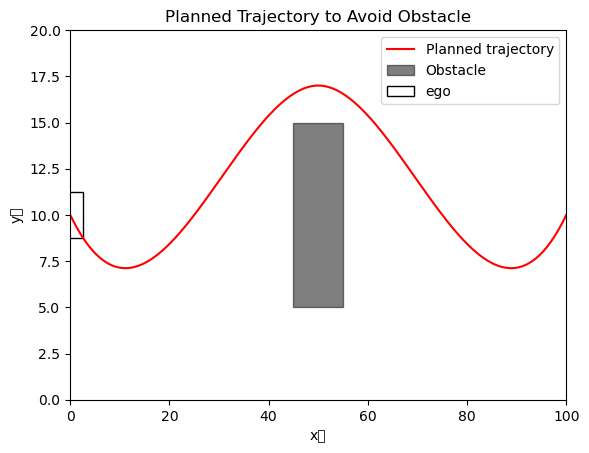

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# 设置随机种子以便结果可重复
np.random.seed(42)

# 场景设置
road_length = 100
road_width = 20
obstacle_position = (50, 10)
obstacle_size = (10, 10)  # 障碍物的宽度和高度

# 自车的初始位置和目标位置
start_position = (0, 10)
goal_position = (100, 10)

# Lattice规划并生成平滑轨迹
def lattice_path(start, goal, obstacle_pos, obstacle_size):
    x = np.linspace(start[0], goal[0], 5)
    y = np.linspace(start[1], goal[1], 5)
    
    # 检测并避开障碍物
    for i in range(len(x)):
        if obstacle_pos[0] - obstacle_size[0]/2 < x[i] < obstacle_pos[0] + obstacle_size[0]/2:
            y[i] += obstacle_size[1] / 2 + 2  # 绕过障碍物
    
    # 使用三次样条插值生成平滑轨迹
    cs = CubicSpline(x, y)
    x_new = np.linspace(start[0], goal[0], 500)
    y_new = cs(x_new)
    
    return x_new, y_new

# 生成轨迹
x_smooth, y_smooth = lattice_path(start_position, goal_position, obstacle_position, obstacle_size)

# 可视化
fig, ax = plt.subplots()
ax.plot(x_smooth, y_smooth, 'r-', label='Planned trajectory')
rect = plt.Rectangle((obstacle_position[0] - obstacle_size[0]/2, obstacle_position[1] - obstacle_size[1]/2),
                     obstacle_size[0], obstacle_size[1], color='black', alpha=0.5, label='Obstacle')
ax.add_patch(rect)
rect_ego = plt.Rectangle((start_position[0] - 2.5, start_position[1] - 1.25),
                         5, 2.5, edgecolor='black', facecolor='none', label='ego')
ax.add_patch(rect_ego)
ax.legend()
ax.set_xlim(0, road_length)
ax.set_ylim(0, road_width)
ax.set_xlabel('x轴')
ax.set_ylabel('y轴')
ax.set_title('Planned Trajectory to Avoid Obstacle')
plt.show()
